In [1]:
import numpy as np
import scipy as sp
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

from skimage.morphology import disk, closing, medial_axis
from skimage.feature import peak_local_max

%matplotlib notebook

In [2]:
# import 3D points
# stored at: https://github.com/mycarta/rainbowbot/blob/master/stuff4path_finding/loop.txt
points = np.load('raw_data_path_Matt.npy')

print points.shape

(100, 3)


In [3]:
print points[:3, :]

points = np.around(points, decimals=2)
print points[:3, :]

[[ 0.81127451  0.22794118  0.52009804]
 [ 0.62986425  0.4546003   0.12971342]
 [ 0.50666667  0.41137255  0.65215686]]
[[ 0.81  0.23  0.52]
 [ 0.63  0.45  0.13]
 [ 0.51  0.41  0.65]]


<IPython.core.display.Javascript object>


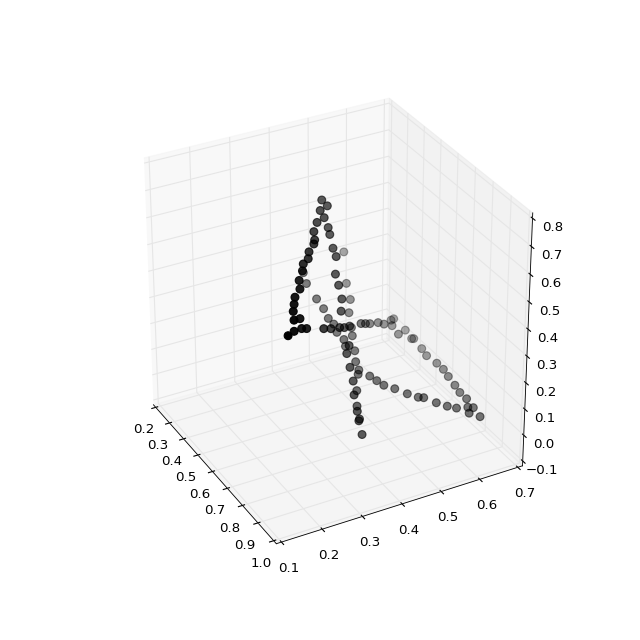

In [4]:
# plot 


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0],points[:,1], points[:,2], c=[0, 0, 0], s=50)
plt.show()

In [5]:
# create 3D binary image
b = np.zeros((100,100,100))
indices = np.rint(points * 100).astype(int)
b[list(indices.T)] = 1

print indices[:3, :]
print np.amin(b), np.amax(b)
print b.shape

# create coordinates
(X,Y,Z)=np.mgrid[0:100:1, 0:100:1, 0:100:1]
print X.shape

[[81 23 52]
 [63 45 13]
 [51 41 65]]
0.0 1.0
(100, 100, 100)
(100, 100, 100)


<IPython.core.display.Javascript object>


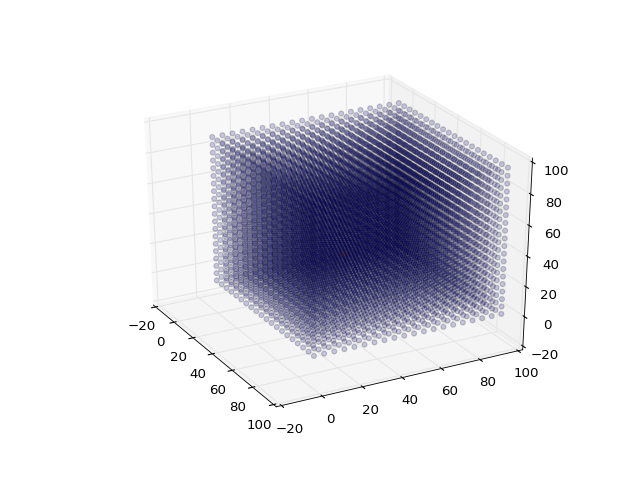

In [6]:
# Was it right? 

# Display it as 3D scatter plot (decimated a bit otherwise it won't show, but that means it's very unlikely 
# we'll display any of the '1's)
# http://stackoverflow.com/questions/16072197/python-big-set-of-2d-numpy-arrays-how-to-visualize-in-3d

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

col = b[0:-1:5, 0:-1:5, 0:-1:5,]
ax.scatter(X[0:-1:5,0:-1:5,0:-1:5], Y[0:-1:5,0:-1:5,0:-1:5], Z[0:-1:5,0:-1:5,0:-1:5], c=col, alpha=0.2)


<IPython.core.display.Javascript object>


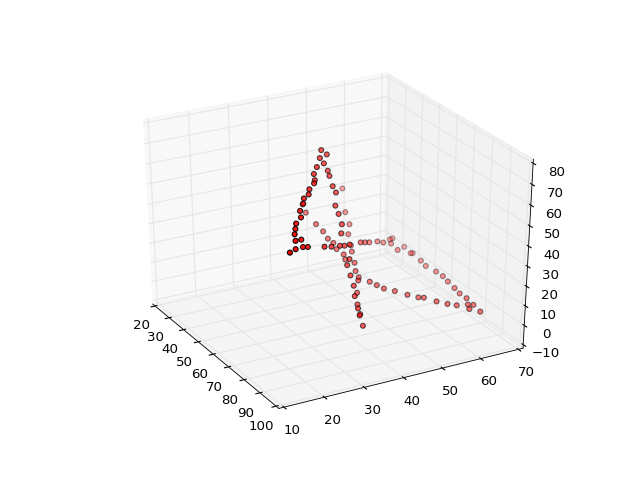

In [7]:
# With this  we get to see just the '1's, not the '0's
# http://stackoverflow.com/questions/12414619/creating-a-3d-plot-from-a-3d-numpy-array

x,y,z = b.nonzero()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c= 'red')

<IPython.core.display.Javascript object>


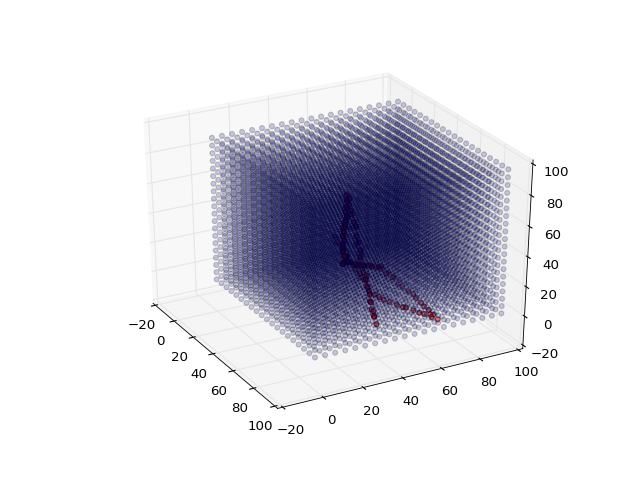

In [8]:
# combined plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

col = b[0:-1:5, 0:-1:5, 0:-1:5,]
ax.scatter(X[0:-1:5,0:-1:5,0:-1:5], Y[0:-1:5,0:-1:5,0:-1:5], Z[0:-1:5,0:-1:5,0:-1:5], c=col, alpha=0.2)
ax.scatter(x, y, z, c= 'red')